In [8]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import pprint, pickle
import seaborn as sns
import math

In [2]:
name='Geemanthi evidence 1'

f_file = open('{}'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()

# functions

In [35]:
def get_peaks(df,y,prom):
    peaks, _ = find_peaks(-y,prominence=prom)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

def time_diff(peaks):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

def distribution(data):
    ax=sns.distplot(data,
                kde=True,
                bins=8,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.60})
    ax.set(xlabel='Binomial',ylabel='Frequency')
    plt.show()
    
def comb_dir_arrays(foward_array,backward_array,plus,minus):   
    if plus<minus:
        array=com(foward_array,backward_array)
    elif plus>minus:
        array=com(backward_array,foward_array)
    return array

# upper body height

In [9]:
H=[]
for i in range(len(key_array)):
    #time
    t=key_array[i][12][3]
    #upper body height
    ubh=abs((key_array[i][11][1]+key_array[i][12][1])-(key_array[i][23][1]+key_array[i][24][1]))/2
    #shoulder length
    sl=abs(key_array[i][11][0]-key_array[i][12][0])
    #center of upper body in depth
    center=(key_array[i][11][2]+key_array[i][12][2]+key_array[i][23][2]+key_array[i][24][2])/4
    
    #
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    #sldir=key_array[i][11][0]-key_array[i][12][0]
    right=key_array[i][12][0]
    left=key_array[i][11][0]
    H.append([ubh])
    H[i].append(t)
    H[i].append(sl)
    H[i].append(sl/ubh)
    H[i].append(center)
    H[i].append(right)
    H[i].append(left)
    #H[i].append(sldir)
    H[i].append(heel_r)
    H[i].append(foot_index_r)
    H[i].append(heel_l)
    H[i].append(foot_index_l)
H_array = np.array(H)
print(H_array)


df = pd.DataFrame(H_array,columns=['ubh','t','sl','sln','center','r_sdr','l_sdr','h_R','f_R','h_L','f_L'])
print(df)

[[1.13750681e-01 1.65849103e+09 4.51641232e-02 ... 2.32212275e-01
  2.13283628e-01 2.18609422e-01]
 [1.21784359e-01 1.65849103e+09 4.00632024e-02 ... 2.21139044e-01
  2.08840072e-01 2.15299189e-01]
 [1.26749903e-01 1.65849103e+09 3.52599621e-02 ... 2.14818448e-01
  2.04128593e-01 2.10733384e-01]
 ...
 [1.31079689e-01 1.65849105e+09 2.81048417e-02 ... 1.99195862e-01
  1.71641827e-01 1.99523509e-01]
 [1.28992990e-01 1.65849105e+09 3.00464630e-02 ... 2.01918989e-01
  1.65612608e-01 1.90861315e-01]
 [1.26452729e-01 1.65849105e+09 3.30782533e-02 ... 2.04761237e-01
  1.63686007e-01 1.94882244e-01]]
          ubh             t        sl       sln    center     r_sdr     l_sdr  \
0    0.113751  1.658491e+09  0.045164  0.397045 -0.038436  0.080518  0.125682   
1    0.121784  1.658491e+09  0.040063  0.328968 -0.024348  0.079404  0.119468   
2    0.126750  1.658491e+09  0.035260  0.278185 -0.024815  0.078795  0.114055   
3    0.128524  1.658491e+09  0.032482  0.252728 -0.021270  0.077932  0.11041

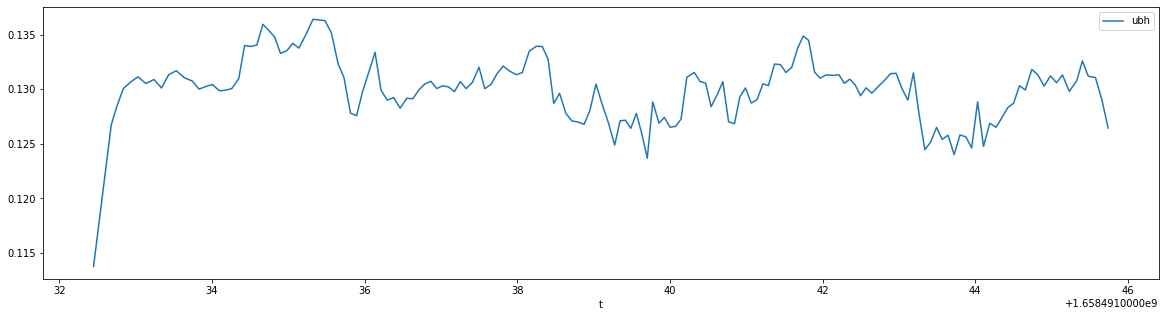

In [10]:
df.plot(x ='t', y='ubh', kind = 'line',figsize=(20,5))
#plt.ylim(0,0.2)
plt.show()

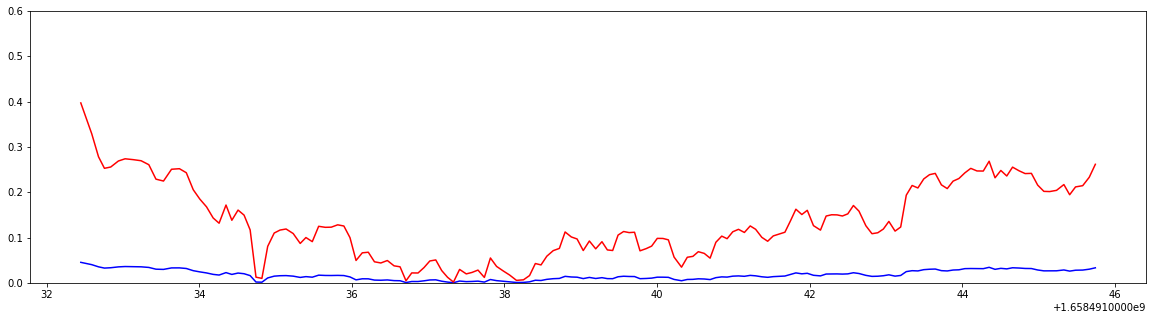

In [11]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.sl,'b')
plt.plot(df.t,df.sln,'r')
plt.ylim(0,0.6)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


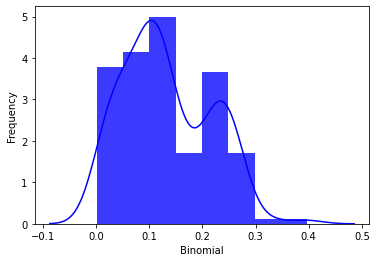

In [12]:

from scipy.stats import binom
data=df.sln
ax=sns.distplot(data,
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.show()

In [13]:
from scipy import signal
b, a = signal.butter(1, 0.1, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, df.ubh)

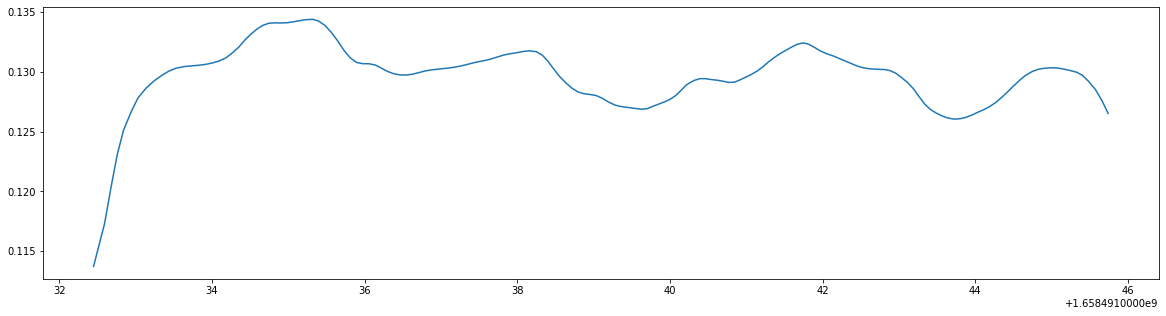

In [14]:
plt.figure(figsize=(20,5))
plt.plot(df.t,low_passed)
plt.show()

# walking direction

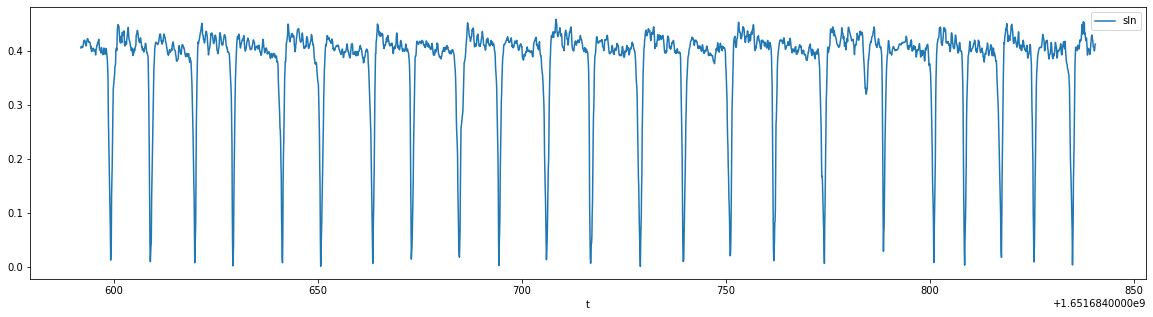

In [20]:
df.plot(x ='t', y='sln', kind = 'line',figsize=(20,5))
#plt.ylim(0,0.2)
plt.show()

    index             t
0      90  1.651685e+09
1     214  1.651685e+09
2     354  1.651685e+09
3     475  1.651685e+09
4     630  1.651685e+09
5     753  1.651685e+09
6     916  1.651685e+09
7    1040  1.651685e+09
8    1191  1.651685e+09
9    1312  1.651685e+09
10   1457  1.651685e+09
11   1599  1.651685e+09
12   1754  1.651685e+09
13   1892  1.651685e+09
14   2039  1.651685e+09
15   2179  1.651685e+09
16   2338  1.651685e+09
17   2529  1.651685e+09
18   2688  1.651685e+09
19   2787  1.651685e+09
20   2902  1.651685e+09
21   3005  1.651685e+09
22   3120  1.651685e+09


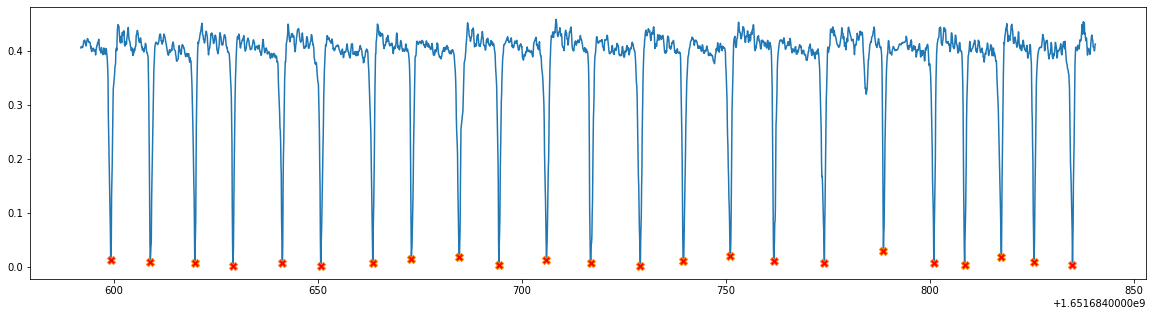

In [21]:
return_points,_=find_peaks(-df.sln,prominence=0.3)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.plot(df.t,df.sln)
plt.plot(df.t[return_points], df.sln[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [22]:

return_points_L =return_points[1::2]



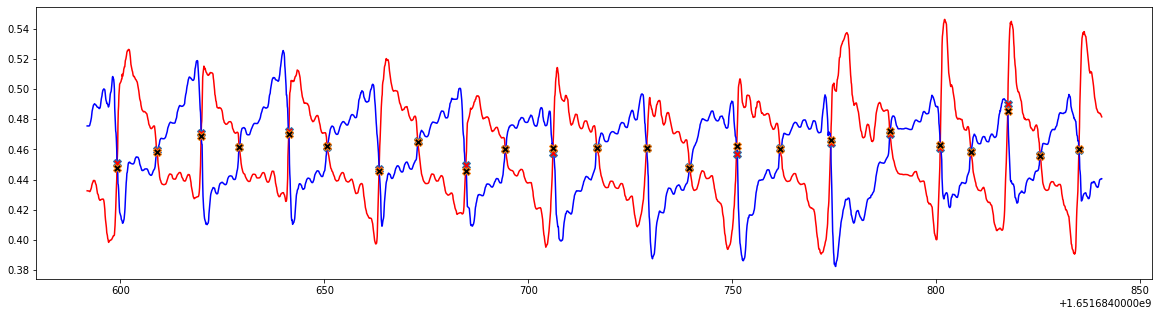

In [23]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.r_sdr,'r')
plt.plot(df.t,df.l_sdr,'b')
plt.plot(df.t[return_points], df.r_sdr[return_points],"X",markerfacecolor='red',markersize=8)
plt.plot(df.t[return_points], df.l_sdr[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

#if right shoulder value <left shoulder ,then man walking towards(front)

In [24]:
df_foward=df[df.r_sdr < df.l_sdr] 
df_backward=df[df.r_sdr > df.l_sdr]
df_foward =df_foward.reset_index()
df_backward=df_backward.reset_index()
print(df_foward)
print(df_backward)

      index       ubh             t        sl       sln    center     r_sdr  \
0         0  0.105988  1.651685e+09  0.042918  0.404935 -0.014940  0.432638   
1         1  0.105479  1.651685e+09  0.043015  0.407802 -0.016280  0.432543   
2         2  0.105568  1.651685e+09  0.042965  0.406990 -0.014370  0.432548   
3         3  0.105790  1.651685e+09  0.042961  0.406098 -0.009548  0.432548   
4         4  0.105986  1.651685e+09  0.043008  0.405787 -0.010191  0.432499   
...     ...       ...           ...       ...       ...       ...       ...   
1687   3116  0.258267  1.651685e+09  0.042318  0.163855 -0.003381  0.426411   
1688   3117  0.262286  1.651685e+09  0.033265  0.126828 -0.012773  0.432404   
1689   3118  0.253711  1.651685e+09  0.023374  0.092128  0.001110  0.442442   
1690   3119  0.252708  1.651685e+09  0.016689  0.066039 -0.013863  0.448626   
1691   3120  0.257492  1.651685e+09  0.000777  0.003018 -0.014049  0.459621   

         l_sdr       h_R       f_R       h_L       

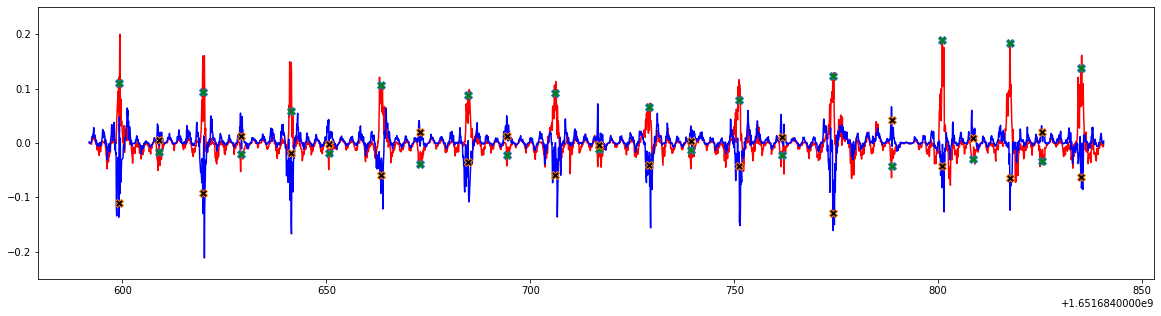

In [25]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.r_sdr, k=4, s=0)
r_sdr_diff= spl.derivative()
spl = UnivariateSpline(df.t, df.l_sdr, k=4, s=0)
l_sdr_diff= spl.derivative()

plt.figure(figsize=(20,5))
plt.ylim(-0.25,0.25)
plt.plot(df.t,r_sdr_diff(df.t),'r')
plt.plot(df.t,l_sdr_diff(df.t),'b')
plt.plot(df.t[return_points], r_sdr_diff(df.t)[return_points],"X",markerfacecolor='green',markersize=8)
plt.plot(df.t[return_points], l_sdr_diff(df.t)[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

In [26]:
diff_r=r_sdr_diff(df.t)[return_points]
diff_l=l_sdr_diff(df.t)[return_points]

if diff_r[0]>diff_l[0]:
    return_points_front = return_points[::2]
    return_points_back = return_points[1::2]
    plus=1
    minus=0
elif diff_l[0]>diff_r[0]:
    return_points_front = return_points[1::2]
    return_points_back = return_points[::2]
    minus=0
    plus=0
else:
    print('error')
    

In [21]:
plus=0
minus=1

In [32]:
return_points=[0,len(df)-1]
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()

if plus==1:
    df_foward=df
    return_points_front=return_points
elif minus==1:
    df_backward=df
    return_points_back=return_points
    


# time parameters

# right

# forward

In [23]:
def sample(df,strike_peak,time_return_points):
    a = np.array(df.t[strike_peak])
    sample_strikes=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : df.t[strike_peak[a]], index[0]))
        sample_strikes.append(s)
    return sample_strikes

def strides(sample_strikes):
    strides=[]
    for strike in sample_strikes:
        sample=[]
        for i in range(len(strike)-1):
            t_diff=strike[i+1]-strike[i]
            sample.append(t_diff)
        strides.append(sample)
    return strides

def remove_time_gap(data):
    from statistics import stdev,mean
    SD=stdev(data)
    m= mean(data)
 
    cut_off = SD * 0.5
    upper =  m + cut_off
    array = [x for x in data if x < upper]
    return array

def remove_distinc(array,df,Time_to_index_ratio,y):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*0.5
    
    peaks, _ = find_peaks(-y,prominence=0.03,distance=Distance)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C

In [25]:
if plus==1:
    peaks=get_peaks(df_foward,df_foward.h_R,0.03)
    df_foward['norm_h_R']=(df_foward.h_R/df_foward.ubh)
    peaks=get_peaks(df_foward,df_foward.norm_h_R,0.2)
    Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
    print(Time_to_index_ratio)
    
    dt_foward_right=time_diff(peaks)
    print(dt_foward_right)
    distribution(dt_foward_right)
    
    dt_foward_right_new=remove_time_gap(dt_foward_right)
    print(dt_foward_right_new)
    distribution(dt_foward_right_new)
    
    foward_peaks_R=remove_distinc(dt_foward_right,df_foward,Time_to_index_ratio,df_foward.norm_h_R)
    
    dt_foward_right=time_diff(foward_peaks_R)
    dt_foward_right_cleaned=remove_time_gap(dt_foward_right)
    distribution(dt_foward_right_cleaned)

# backward direction

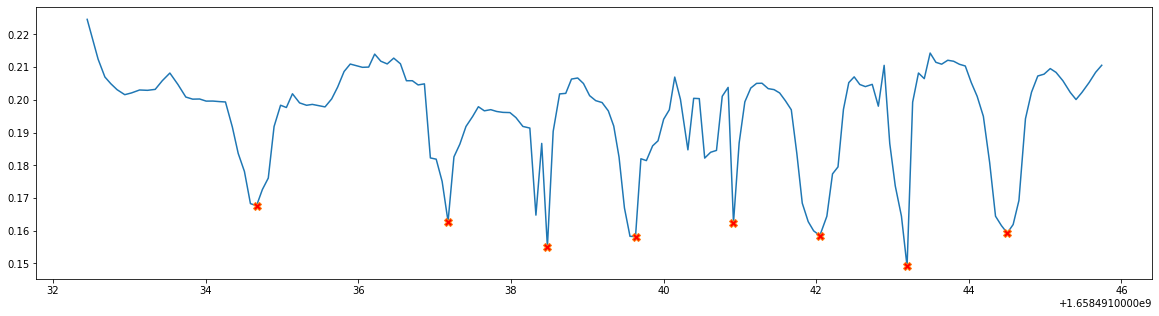

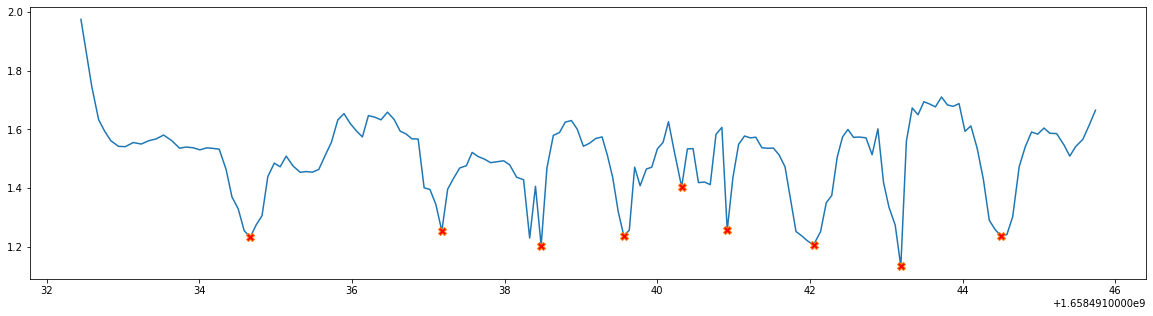

[2.5094988346099854, 1.3014633655548096, 1.0822570323944092, 0.7586803436279297, 0.597226619720459, 1.1315064430236816, 1.142700433731079, 1.3121440410614014]


/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


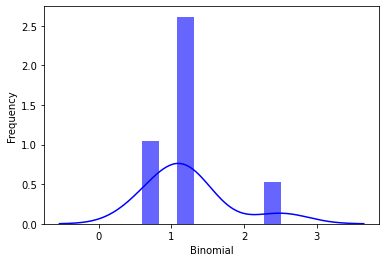

[1.3014633655548096, 1.0822570323944092, 0.7586803436279297, 0.597226619720459, 1.1315064430236816, 1.142700433731079, 1.3121440410614014]


/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


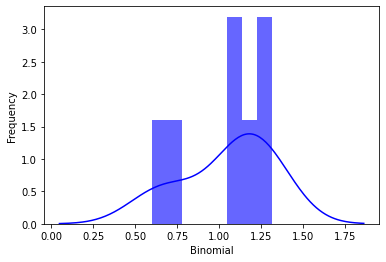

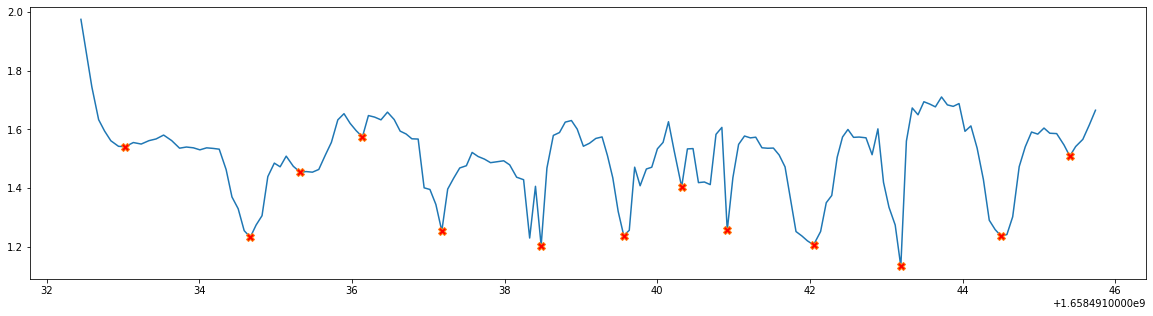

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


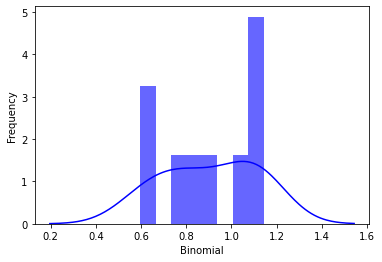

In [27]:
if minus==1:
    peaks=get_peaks(df_backward,df_backward.h_R,0.03)
    
    Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
    df_backward['norm_h_R']=(df_backward.h_R/df_backward.ubh)
    peaks=get_peaks(df_backward,df_backward.norm_h_R,0.2)
    dt_backward_right=time_diff(peaks)
    print(dt_backward_right)
    distribution(dt_backward_right)
    
    dt_backward_right_new=remove_time_gap(dt_backward_right)
    print(dt_backward_right_new)
    distribution(dt_backward_right_new)
    
    backward_peaks_R=remove_distinc(dt_backward_right,df_backward,Time_to_index_ratio,df_backward.norm_h_R)
    
    dt_backward_right=time_diff(backward_peaks_R)
    dt_backward_right_cleaned=remove_time_gap(dt_backward_right)
    distribution(dt_backward_right_cleaned)

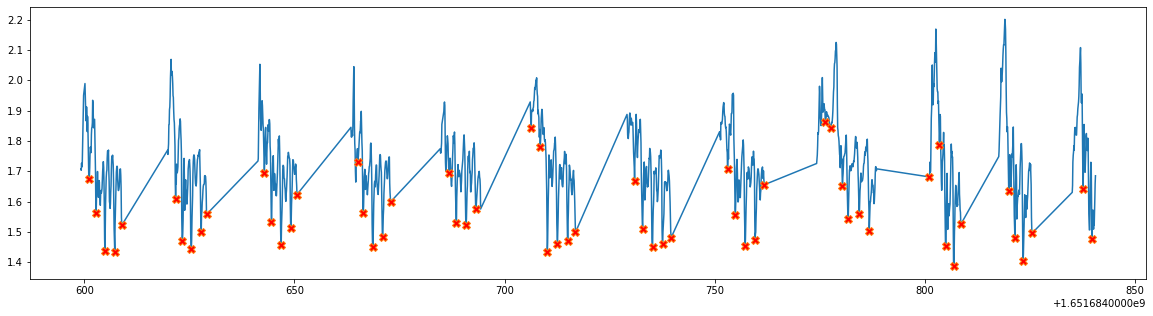

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


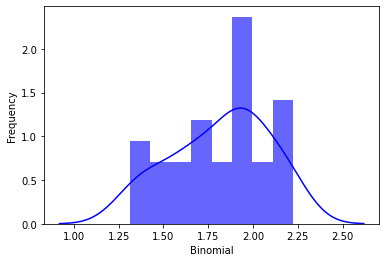

# left

In [28]:
if plus==1:
    peaks=get_peaks(df_foward,df_foward.h_L,0.03)
    df_foward['norm_h_L']=(df_foward.h_L/df_foward.ubh)
    peaks=get_peaks(df_foward,df_foward.norm_h_L,0.2)
    dt_foward_left=time_diff(peaks)
    print(dt_foward_left)
    distribution(dt_foward_left)
    
    dt_foward_left_new=remove_time_gap(dt_foward_left)
    print(dt_foward_left_new)
    distribution(dt_foward_left_new)
    
    foward_peaks_L=remove_distinc(dt_foward_left,df_foward,Time_to_index_ratio,df_foward.norm_h_L)
    
    dt_foward_left=time_diff(foward_peaks_L)
    dt_foward_left_cleaned=remove_time_gap(dt_foward_left)
    distribution(dt_foward_left_cleaned)

# left-backward

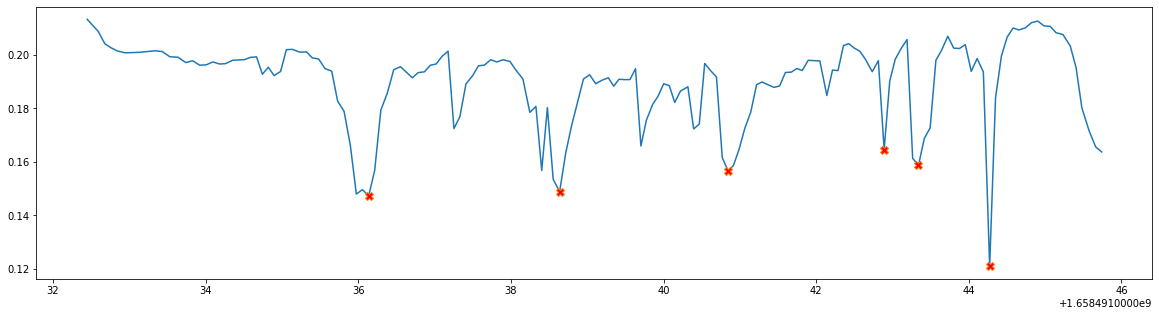

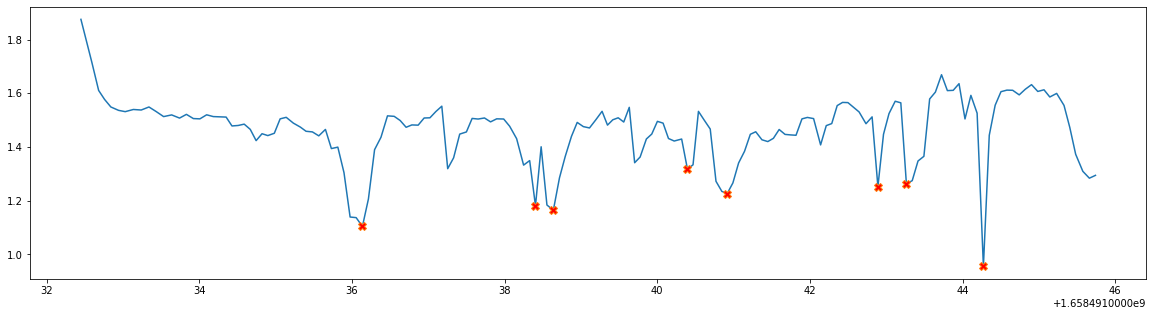

[2.2674484252929688, 0.23427248001098633, 1.75649094581604, 0.5216982364654541, 1.9740486145019531, 0.373370885848999, 1.00881028175354]


/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


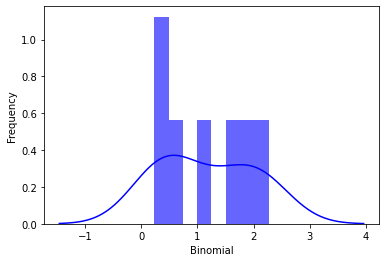

[0.23427248001098633, 0.5216982364654541, 0.373370885848999, 1.00881028175354]


/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


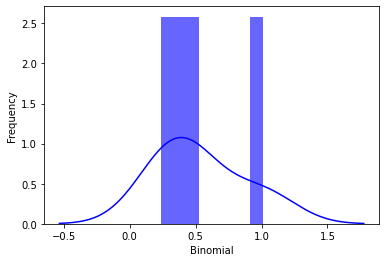

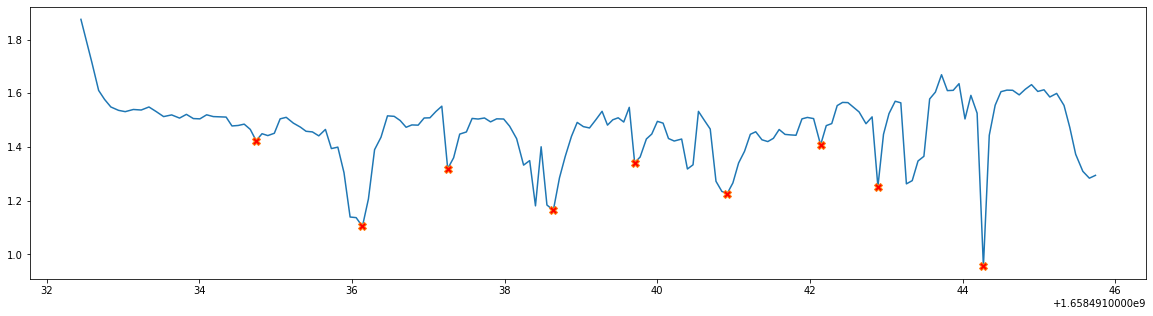

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


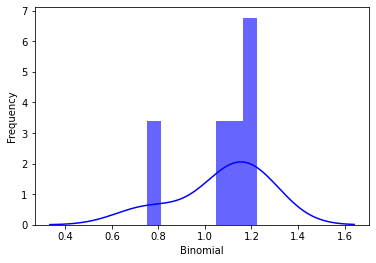

In [30]:
if minus==1:
    peaks=get_peaks(df_backward,df_backward.h_L,0.03)
    df_backward['norm_h_L']=(df_backward.h_L/df_backward.ubh)
    peaks=get_peaks(df_backward,df_backward.norm_h_L,0.2)
    dt_backward_left=time_diff(peaks)
    print(dt_backward_left)
    distribution(dt_backward_left)

    dt_backward_left_new=remove_time_gap(dt_backward_left)
    print(dt_backward_left_new)
    distribution(dt_backward_left_new)

    backward_peaks_L=remove_distinc(dt_backward_left,df_backward,Time_to_index_ratio,df_backward.norm_h_L)

    dt_backward_left=time_diff(backward_peaks_L)
    dt_backward_left_cleaned=remove_time_gap(dt_backward_left)
    distribution(dt_backward_left_cleaned)

# sampling right leg

In [37]:
if plus==1:
    sample_strikes_foward_R=sample(df_foward,foward_peaks_R,time_return_points)
    strides_foward_R=strides(sample_strikes_foward_R)
    print(strides_foward_R)
    
    avg_stride_foward_R=list(map(lambda a : np.mean(a), strides_foward_R))
    print(avg_stride_foward_R)
    
if minus==1:
    sample_strikes_backward_R=sample(df_backward,backward_peaks_R,time_return_points)
    strides_backward_R=strides(sample_strikes_backward_R)
    print(strides_backward_R)
    
    avg_stride_backward_R=list(map(lambda a : np.mean(a), strides_backward_R))
    print(avg_stride_backward_R)

[[1.6383330821990967, 0.6559417247772217, 0.8132743835449219, 1.0402827262878418, 1.3014633655548096, 1.0822570323944092, 0.7586803436279297, 0.597226619720459, 1.1315064430236816, 1.142700433731079, 1.3121440410614014, 0.9016931056976318]]
[1.031291941801707]


# sampling-left leg

In [38]:
if plus==1:
    sample_strikes_foward_L=sample(df_foward,foward_peaks_L,time_return_points)
    strides_foward_L=strides(sample_strikes_foward_L)
    print(strides_foward_L)
    
    avg_stride_foward_L=list(map(lambda a : np.mean(a), strides_foward_L[plus::2]))
    print(avg_stride_foward_L)
    
if minus==1:
    sample_strikes_backward_L=sample(df_backward,backward_peaks_L,time_return_points)
    strides_backward_L=strides(sample_strikes_backward_L)
    print(strides_backward_L)
    
    avg_stride_backward_L=list(map(lambda a : np.mean(a), strides_backward_L[minus::2]))
    print(avg_stride_backward_L)

[[1.3925724029541016, 1.1174216270446777, 1.3842992782592773, 1.0652356147766113, 1.2129535675048828, 1.2232568264007568, 0.7507917881011963, 1.382181167602539]]
[]


# define feature vector array

In [39]:
TP_front=[]
T_f=[[[None],[None]],[[None],[None]]]

# stride time

In [40]:
if plus==1:
    T3=avg_stride_foward_R
    T4=avg_stride_foward_L
elif minus==1:
    T3=avg_stride_backward_R
    T4=avg_stride_backward_L
    
T_f[1][0]=T3
T_f[1][1]=T4

# step time calculate

In [41]:
def step_time(right,left):
    L_array=[]
    R_array=[]
    try:
        if len(right)==len(left):
            if left[0]>right[0]:
                #print(1)
                Lstep=np.subtract(left,right) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left[:-1]) 
                R_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(right,left)
                R_array=Rstep
                Lstep=np.subtract(left[1:],right[:-1]) 
                L_array=Lstep

        elif (len(right)+1)==len(left):#when left strides are max by one
            if right[0]>left[0]:
                #print(3)
                Lstep=np.subtract(left[1:],right) 
                L_array=Lstep
                Rstep=np.subtract(right,left[:-1]) 
                R_array=Rstep

        elif len(right)==(len(left)+1):#when right strides are max by one
            if left[0]>right[0]:
                #print(4)
                Lstep=np.subtract(left,right[:-1]) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left) 
                R_array=Rstep

        else:
            #print(5)
            L_array.append('ooa')
            R_array.append('ooa')
    except:
        L_array.append('ooa')
        R_array.append('ooa')
        
    return R_array,L_array
                
def step_time_array(sample_strikes_R,sample_strikes_L):
    R_st_array=[]
    L_st_array=[]
    for i in range(len(sample_strikes_R)):
        if not len(sample_strikes_R[i])==0:
            Rst,Lst=step_time(sample_strikes_R[i],sample_strikes_L[i])
            R_st_array.append(Rst)
            L_st_array.append(Lst)
    return R_st_array,L_st_array  

# foward direction

In [43]:
if plus==1:
    plt.figure(figsize=(20,5))
    plt.plot(df_foward.t,df_foward.norm_h_L,'b')
    plt.plot(df_foward.t,df_foward.norm_h_R,'r')
    plt.plot(df_foward.t[foward_peaks_L], df_foward.norm_h_L[foward_peaks_L],"X",markerfacecolor='red',markersize=8)
    plt.plot(df_foward.t[foward_peaks_R], df_foward.norm_h_R[foward_peaks_R],"X",markerfacecolor='black',markersize=8)
    plt.show()
    
    print(sample_strikes_foward_L)
    print(sample_strikes_foward_R)
    
    step_foward_R,_=step_time_array(sample_strikes_foward_R,sample_strikes_foward_L)
    step_foward_L,_=step_time_array(sample_strikes_foward_L,sample_strikes_foward_R)
    
    print(step_foward_R)
    print(step_foward_L)
    
    avg_step_foward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_foward_L))
    avg_step_foward_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_foward_R))

# backward direction

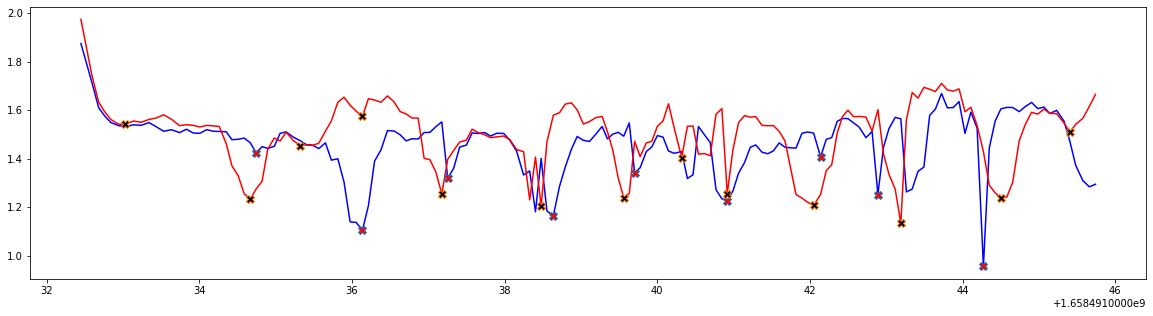

[[1658491034.7443025, 1658491036.136875, 1658491037.2542965, 1658491038.6385958, 1658491039.7038314, 1658491040.916785, 1658491042.1400418, 1658491042.8908336, 1658491044.2730148]]
[[1658491033.0293257, 1658491034.6676588, 1658491035.3236005, 1658491036.136875, 1658491037.1771576, 1658491038.478621, 1658491039.560878, 1658491040.3195584, 1658491040.916785, 1658491042.0482914, 1658491043.1909919, 1658491044.503136, 1658491045.404829]]
[['ooa']]
[['ooa']]


In [45]:

if minus==1:
    plt.figure(figsize=(20,5))
    plt.plot(df_backward.t,df_backward.norm_h_L,'b')
    plt.plot(df_backward.t,df_backward.norm_h_R,'r')
    plt.plot(df_backward.t[backward_peaks_L], df_backward.norm_h_L[backward_peaks_L],"X",markerfacecolor='red',markersize=8)
    plt.plot(df_backward.t[backward_peaks_R], df_backward.norm_h_R[backward_peaks_R],"X",markerfacecolor='black',markersize=8)
    plt.show()
    
    print(sample_strikes_backward_L)
    print(sample_strikes_backward_R)
    
    step_backward_R,_=step_time_array(sample_strikes_backward_R,sample_strikes_backward_L)
    step_backward_L,_=step_time_array(sample_strikes_backward_L,sample_strikes_backward_R)
    
    print(step_backward_R)
    print(step_backward_L)
    
    avg_step_backward_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_backward_L))
    avg_step_backward_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_backward_R))

In [46]:
if plus==1:
    T1=avg_step_foward_R
    T2=avg_step_foward_L
elif minus==1:
    T1=avg_step_backward_R
    T2=avg_step_backward_L
    
T_f[0][0]=T1
T_f[0][1]=T2

In [79]:
output = open('Para_values_front_time{}.pkl'.format(name), 'wb')
pickle.dump(T_s, output)
output.close()

FileNotFoundError: [Errno 2] No such file or directory: 'para_values/test.pkl'